# Clase 01 - Introducción a matplotlib

Profesor: **Fernando Becerra**, f.becerra@udd.cl, www.fernandobecerra.com

Esta es la primera clase práctica del curso "Visualización de la Información" del Magíster de Data Science de la Universidad del Desarrollo. Este notebook servirá de introducción al uso de [matplotlib](https://matplotlib.org) y [pandas](https://pandas.pydata.org) para el análisis y visualización de datos.

## Partes de una figura de matplotlib

Para comenzar, nos familiaricemos con los distintos elementos que componen una figura en `matplotlib`. Es bueno hacer la diferencia entre `figure`, `axes`, y `axis`, ya que esto nos permitirá más adelante manejarlos y personalizarlos a nuestro gusto.

In [1]:
from IPython.display import Image

La antigua versión de `matplotlib` usaba esta figura para hacer visualizar los diferentes componentes.

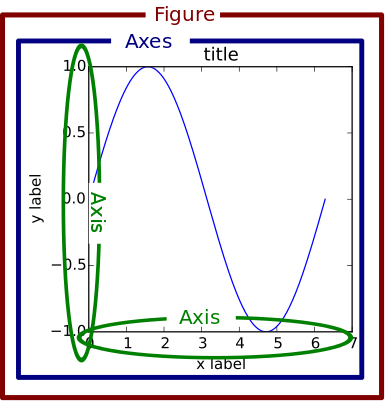

In [2]:
Image("../../images/fig_map.png")

La [nueva documentación](https://matplotlib.org/stable/gallery/showcase/anatomy.html) incluye una figura un poco más ilustrativa, además de los comandos para acceder a cada una de las componentes. Esto nos permitirá modificarlas asta el último detalle.

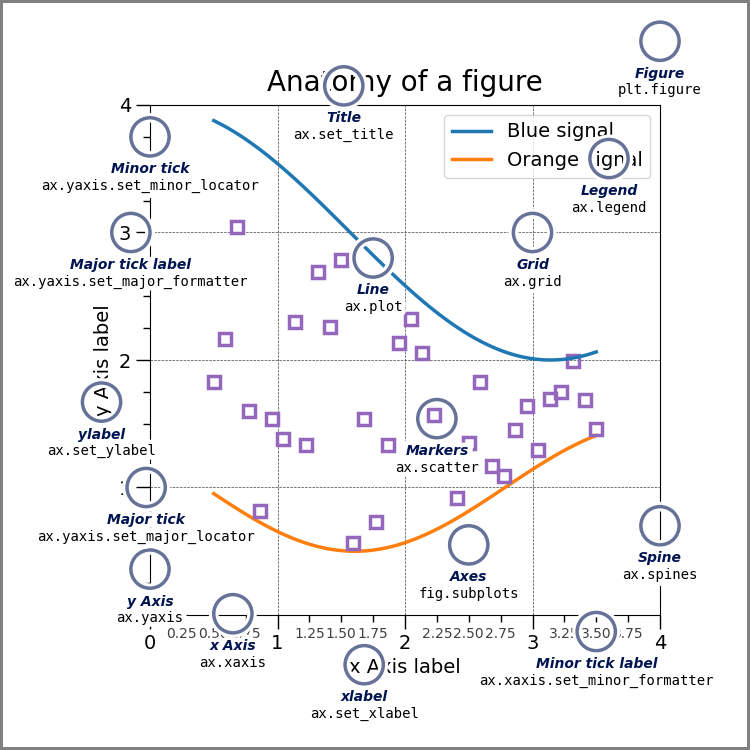

In [3]:
Image("../../images/sphx_glr_anatomy_001.png")

## Gráfico de líneas

Comenzaremos haciendo uno de los gráficos más comunes: el gráfico de líneas. Para eso, importaremos `matplotlib` y `numpy`, lo cual nos permitirá crear datos y graficarlos

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

Creamos los arreglos `x` e `y` que usaremos para nuestra demostración. El `y` será simplemente la función coseno de `x`, variable que va desde -5 a 5.

In [5]:
x = np.linspace(-5, 5, num=50)
y = np.cos(x)

La forma más fácil de usar `matplolib` es usando directamente el método `plot`

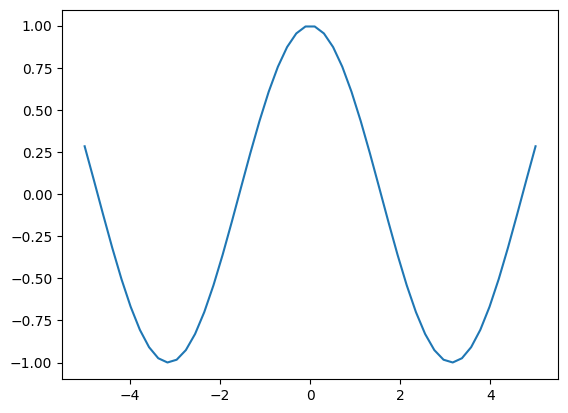

In [6]:
plt.plot(x, y, label='coseno')

De la misma forma, podemos añadirle un título, los nombres de los ejes y una leyenda a la figura.

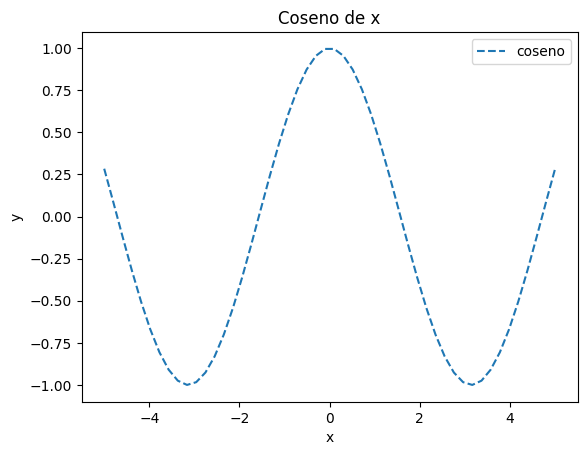

In [7]:
plt.plot(x, y, '--', label='coseno')

plt.title('Coseno de x')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

A pesar de que esa es la forma más fácil de graficar los datos, nosotros queremos tener un mayor control sobre cada componente del gráfico, por lo que es mejor definir una `figure` y un `axes` que podamos manejar más adelante. Para eso ocuparemos `subplots`.

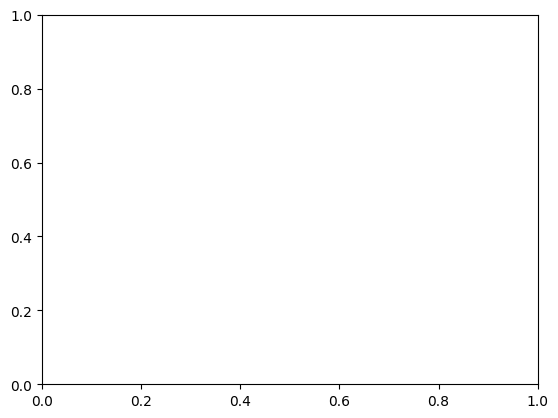

In [8]:
fig, ax = plt.subplots()

Ahora podemos graficar nuestros datos, ponerle un título al gráfico, el nombre a los ejes, y la leyenda. Ojo, que la notación ahora cambia un poco porque `plt` y `ax` **no tienen los mismos métodos**.

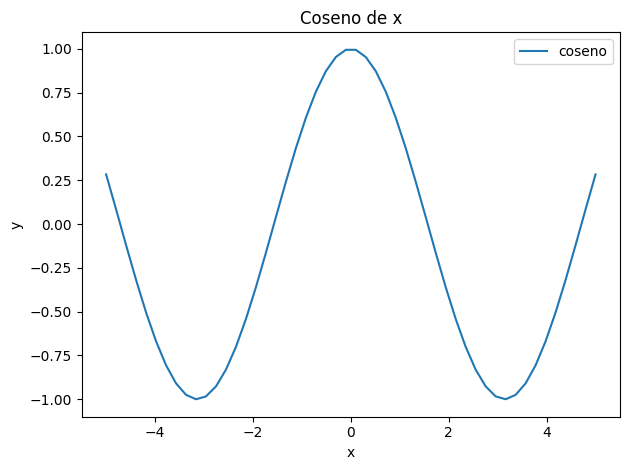

In [9]:
fig, ax = plt.subplots()

ax.plot(x, y, '-', label='coseno')
ax.set_title('Coseno de x')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

fig.tight_layout()

Así vamos a ir agregando más cosas de a poco. Primero agregamos círculos para marcar cada dato.

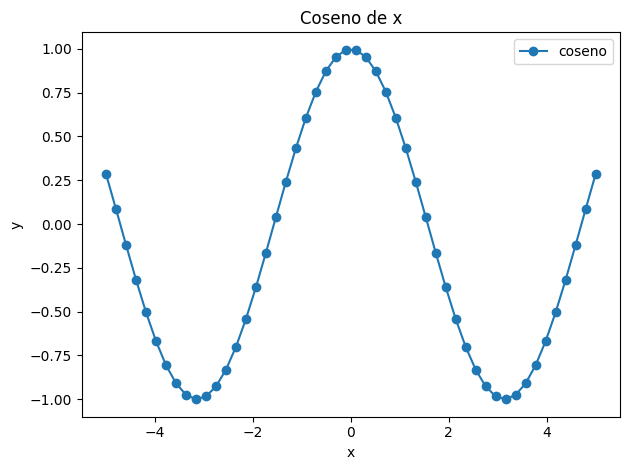

In [10]:
fig, ax = plt.subplots()

ax.plot(x, y, 'o-', label='coseno')
ax.set_title('Coseno de x')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

fig.tight_layout()

Ahora pobramos con colores distintos.

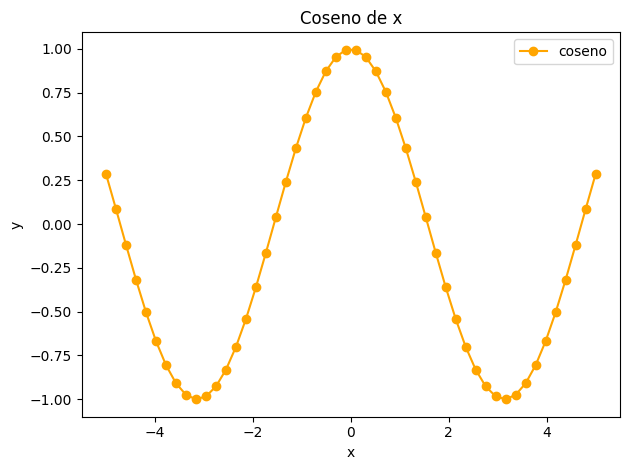

In [11]:
fig, ax = plt.subplots()

ax.plot(x, y, 'o-', color='orange', label='coseno')
ax.set_title('Coseno de x')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

fig.tight_layout()

Ahora añadimos una segunda curva al mismo gráfico, para lo cual definimos la variable `z` como el seno de x. Posteriormente la graficamos usando un color de línea y un símbolo distinto al ya usado por la función coseno. En este caso hay que tener cuidado con el nombre del gráfico porque la función ya no corresponder solamente al coseno de x.

In [12]:
z = np.sin(x)

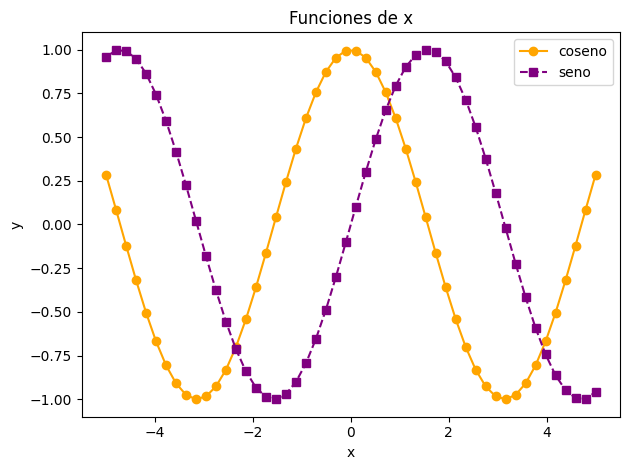

In [13]:
fig, ax = plt.subplots()

ax.plot(x, y, 'o-', color='orange', label='coseno')
ax.plot(x, z, 's--', color='purple', label='seno')
ax.set_title('Funciones de x')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

fig.tight_layout()

La ventaja del `subplots` es que nos permite definiar más de un `axes`, o dicho de otra forma, una grilla de gráficos. Pueden ser tanto horizontal como verticalmente, dependiendo de los parámetros que le demos.

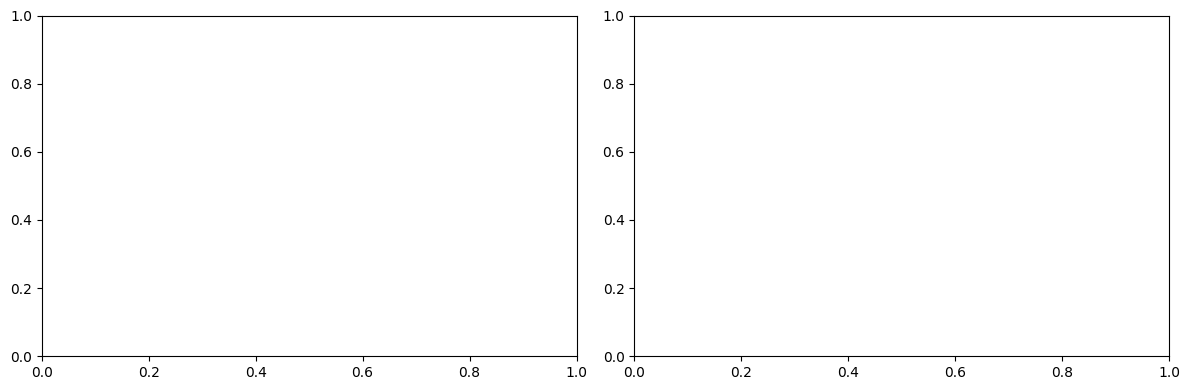

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

fig.tight_layout()

Ahora podemos graficar cada curva en uno de esos `axes` para separarlas.

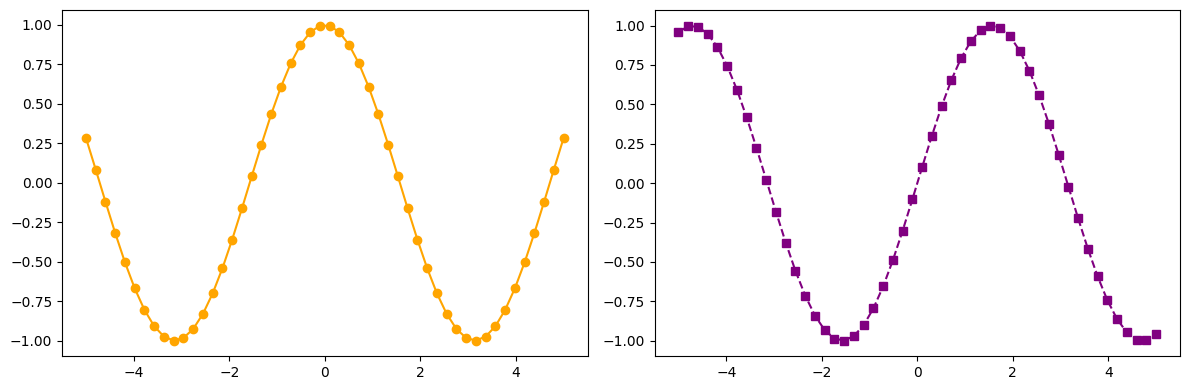

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x, y, 'o-', color='orange', label='coseno')
ax[1].plot(x, z, 's--', color='purple', label='seno')

fig.tight_layout()

Y podemos agregar el título y el nombre de los ejes por separado a cada `axes`

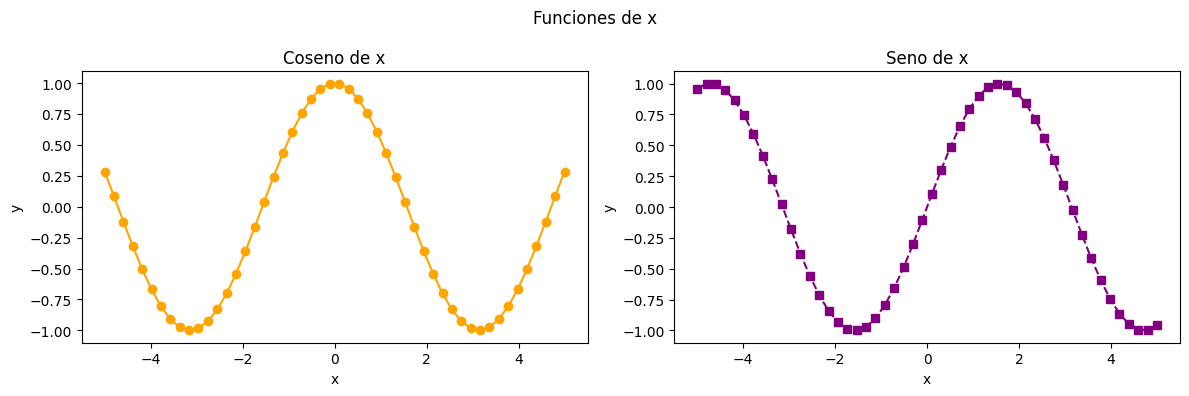

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x, y, 'o-', color='orange', label='coseno')
ax[0].set_title('Coseno de x')
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax[1].plot(x, z, 's--', color='purple', label='seno')
ax[1].set_title('Seno de x')
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")

fig.suptitle('Funciones de x')

fig.tight_layout()

Con eso ya terminamos nuestro primer gráfico de líneas. (Que en verdad fueron dos gráficos de líneas.) Ahora pasamos al siguiente tipo de gráfico: el de dispersión.

## Gráfico de dispersión con datos de Gapminder

Para este ejercicio ocuparemos los datos de Gapminder, que muestran el PBI per cápita y la expectativa de vida para cada país, además de la población y del continente al cual pertenecen. Para cargar estos datos usaremos `pandas` y comenzaremos a trabajar con dataframes.

In [17]:
import pandas as pd

In [18]:
df_scatter = pd.read_csv("../../datos/rosling.csv")
df_scatter.head()

,Country,GDP per capita,Life expectancy,Population,Continent
0,Lesotho,2598,47.1,2174645,Africa
1,Central African Republic,599,49.6,4546100,Africa
2,Swaziland,6095,51.8,1319011,Africa
3,Afghanistan,1925,53.8,33736494,Asia
4,Somalia,624,54.2,13908129,Africa


Definimos las variables `x` e `y` que usaremos para el gráfico.

In [19]:
xlabel = 'GDP per capita'
ylabel = 'Life expectancy'

Por ahora, siguiendo la lógica del gráfico de línea, usaremos `ax.scatter` para el gráfico de dispersión.

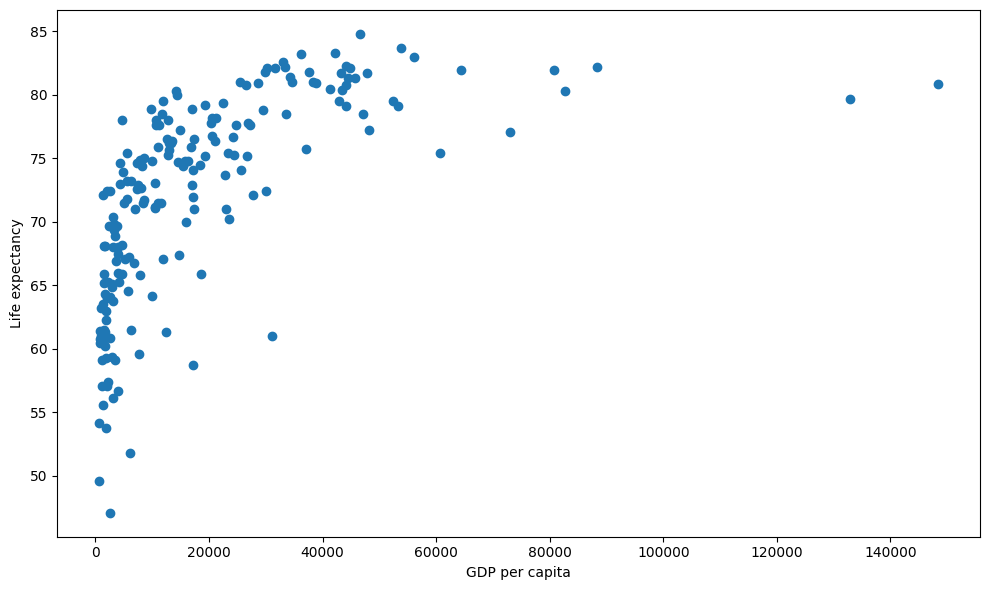

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

fig.tight_layout()

Ahora podemos usar la población de cada país como el radio de los círculos.

In [21]:
size = 'Population'

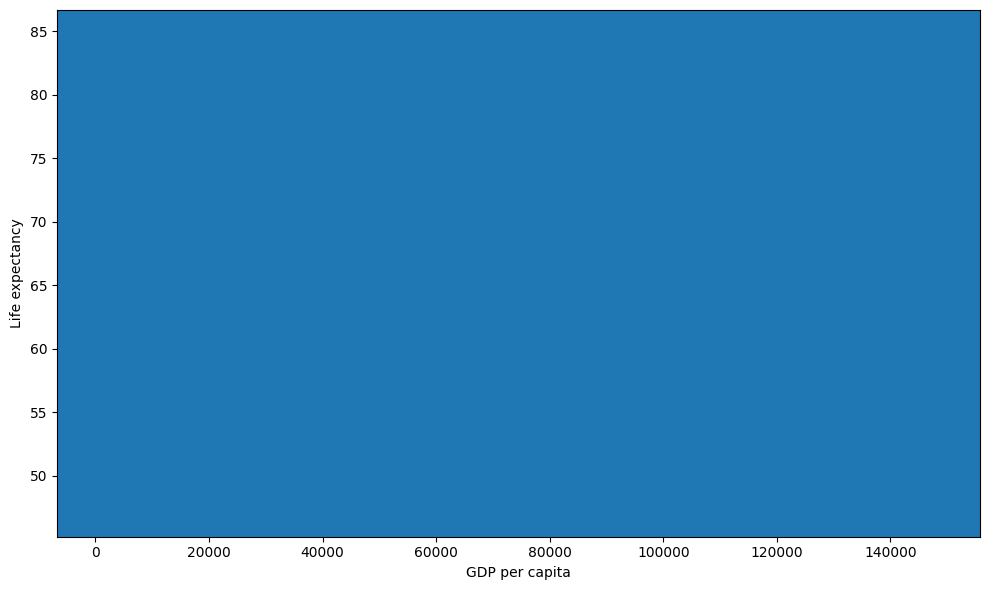

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel], s=df_scatter[size])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

fig.tight_layout()

Bueno, hay que normalizar la población a un valor que nos permita graficar, así que se necesitan unos cálculos extras.

In [23]:
max_population = df_scatter[size].max()
df_scatter['size'] = 2000 * df_scatter[size] / max_population

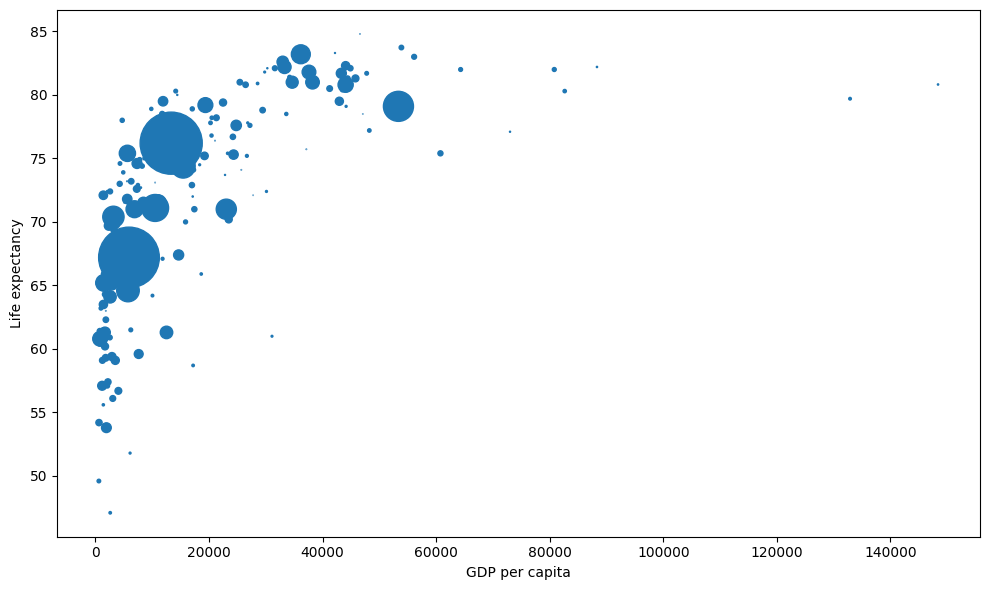

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel], s=df_scatter['size'])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

fig.tight_layout()

Ahora la idea es colorear cada círculo dependiendo del continente al cual pertenece. Para eso debemos definiar una nueva columna con el color de cada país y pasarla como argumento al `ax.scatter`

In [25]:
pd.unique(df_scatter['Continent'])

array(['Africa', 'Asia', 'Australia', 'North America', 'South America',
       'Europe'], dtype=object)

In [26]:
df_scatter['color'] = df_scatter['Continent'].map({
    'Africa': "#e41a1c",
    'Asia': "#377eb8",
    'Australia': "#4daf4a",
    'Europe':"#984ea3",
    'North America': "#ff7f00",
    'South America': "#a65628"
})

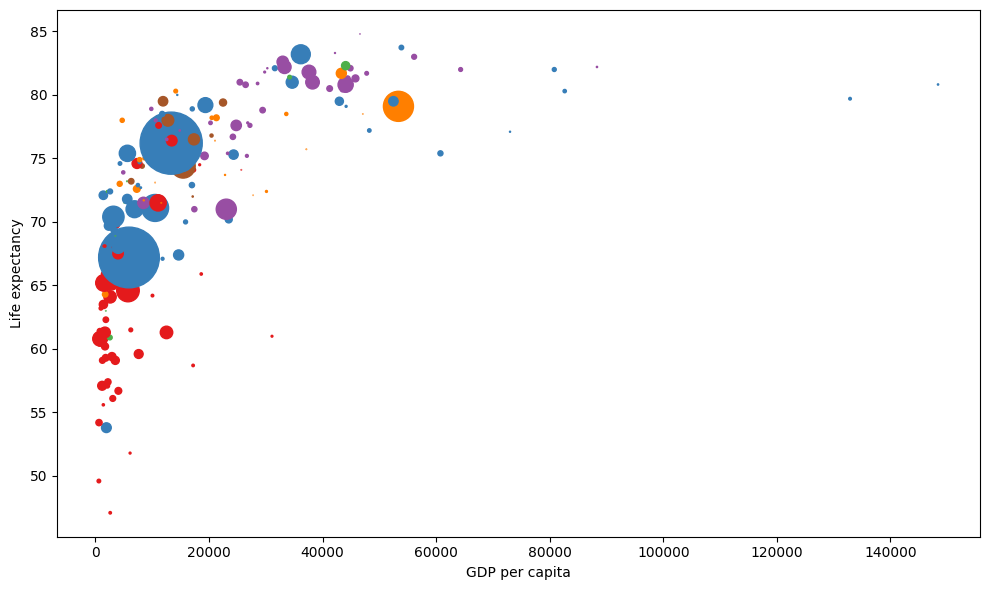

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel],
           s=df_scatter['size'],
           c=df_scatter['color'])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

fig.tight_layout()

Le bajaremos un poco la opacidad y agregaremos border blancos para que se puedan distinguir de mejor forma. Estos pequeños detalles son los que hacen la diferencia y nos llevan a crear las mejores visualizaciones.

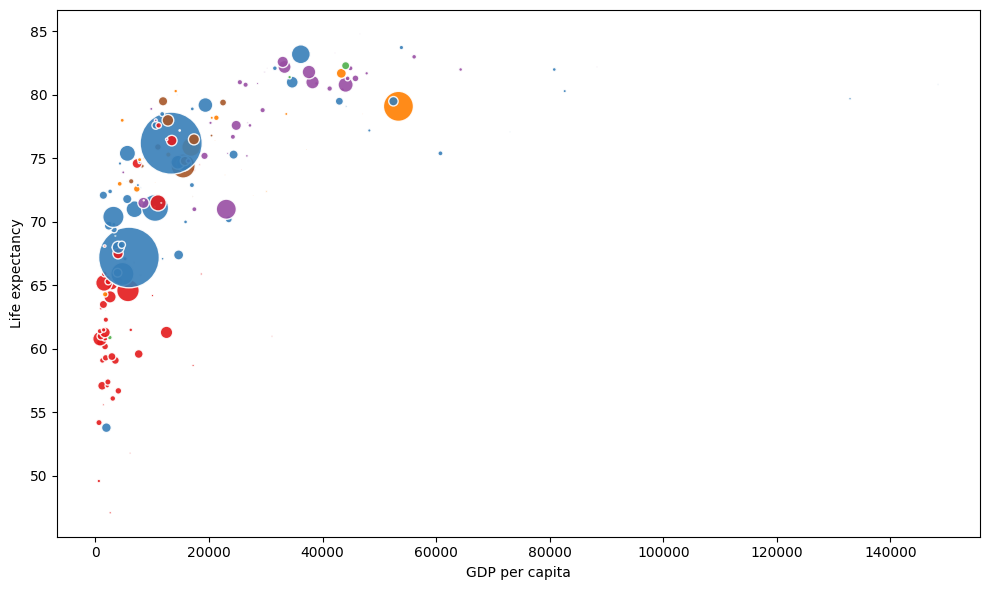

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel],
           s=df_scatter['size'],
           c=df_scatter['color'],
           alpha=0.9,
           edgecolors='white')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

fig.tight_layout()

fig.savefig('figure.png', dpi=100)